In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pickle
import numpy as np

# Comparing Keras, TF, and Pytorch MLP implementations

In [2]:
keras_results = pickle.load(open('./keras/saved_models/mnist-mlp-alpha0.5-run1/results.p', 'rb'))
tf_results = pickle.load(open('./tensorflow/saved_models/mnist-mlp-alpha0.5-run1/results.p', 'rb'))
pytorch_results = pickle.load(open('./pytorch/saved_models/mnist-mlp-alpha0.5-run1/results.p', 'rb'))

In [3]:
keras_results.keys()

dict_keys(['val_ll', 'time', 'val_acc', 'train_bbalpha_loss', 'val_bbalpha_loss', 'val_total_loss', 'train_total_loss', 'train_N', 'train_avg_acc', 'val_avg_acc', 'train_acc', 'train_ll', 'val_N'])

In [4]:
tf_results.keys()

dict_keys(['val_ll', 'val_acc', 'train_bbalpha_loss', 'val_bbalpha_loss', 'val_total_loss', 'train_total_loss', 'train_N', 'train_time', 'train_avg_acc', 'val_time', 'train_acc', 'train_ll', 'val_avg_acc', 'val_N'])

In [5]:
pytorch_results.keys()

dict_keys(['val_ll', 'val_acc', 'train_bbalpha_loss', 'val_bbalpha_loss', 'train_total_loss', 'val_total_loss', 'train_avg_acc', 'train_N', 'train_time', 'val_avg_acc', 'val_time', 'train_acc', 'train_ll', 'val_N'])

In [6]:
def plot_time(keras_results, tf_results, pytorch_results):
    minlen = min([len(keras_results['time']), len(tf_results['train_time']), len(pytorch_results['train_time'])])
    print(minlen)
    tf_time = np.array(tf_results['train_time']) + np.array(tf_results['val_time'])
    pytorch_time = np.array(pytorch_results['train_time']) + np.array(pytorch_results['val_time'])
    keras_time = np.array(keras_results['time'][:minlen])
    f, ax1 = plt.subplots(1, 1)
    ax1.plot(keras_time[:minlen], label='keras')
    ax1.plot(tf_time[:minlen], label='tf')
    ax1.plot(pytorch_time[:minlen], label='pytorch')
    ax1.set_title('Time')
    ax1.legend()

In [7]:
def plot_results(keras_results, tf_results, pytorch_results, key):
    ind = 'train_' + key
    minlen = min([len(keras_results[ind]), len(tf_results[ind]), len(pytorch_results[ind])])
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(keras_results['train_' + key][:minlen], label='keras')
    ax1.plot(tf_results['train_' + key][:minlen], label='tf')
    ax1.plot(pytorch_results['train_' + key][:minlen], label='pytorch')
    ax1.set_title('train_' + key)
    ax1.legend()
    ax2.plot(keras_results['val_' + key][:minlen], label='keras')
    ax2.plot(tf_results['val_' + key][:minlen], label='tf')
    ax2.plot(pytorch_results['val_' + key][:minlen], label='pytorch')
    ax2.set_title('val_' + key)
    ax2.legend()

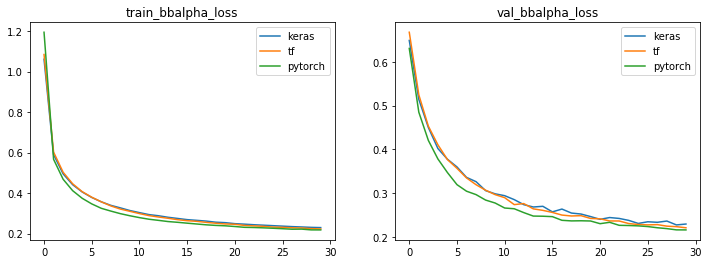

In [8]:
plot_results(keras_results, tf_results, pytorch_results, 'bbalpha_loss')

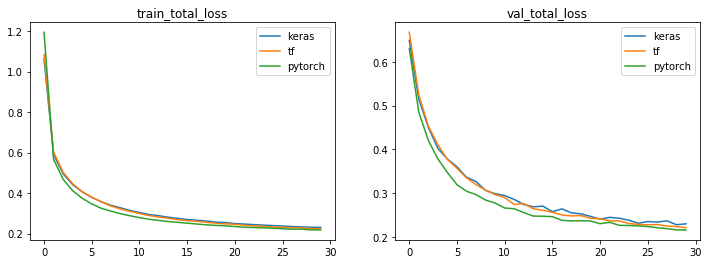

In [9]:
plot_results(keras_results, tf_results, pytorch_results, 'total_loss')

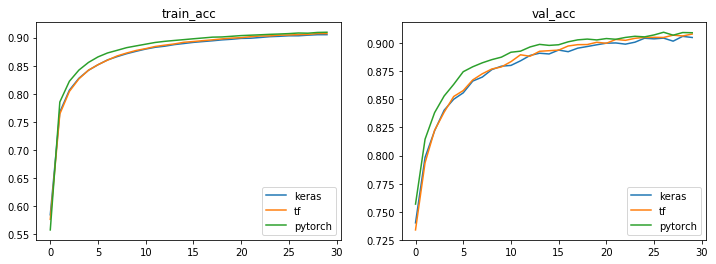

In [10]:
plot_results(keras_results, tf_results, pytorch_results, 'acc')

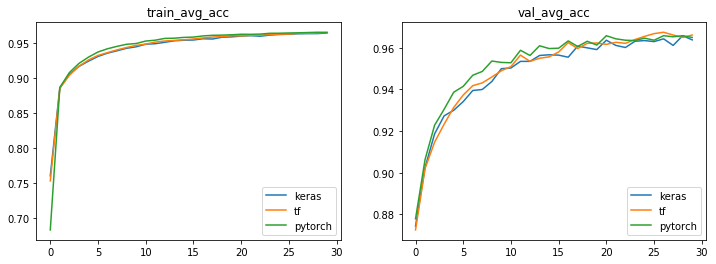

In [11]:
plot_results(keras_results, tf_results, pytorch_results, 'avg_acc')

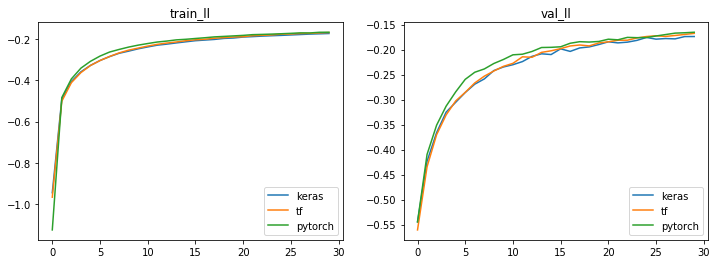

In [12]:
plot_results(keras_results, tf_results, pytorch_results, 'll')

30


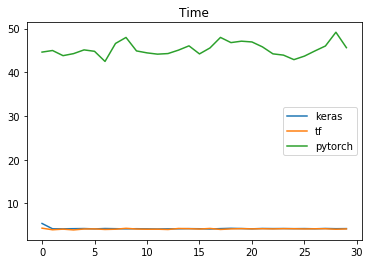

In [13]:
plot_time(keras_results, tf_results, pytorch_results)

# Keras MLP MNIST results

In [14]:
alphas = [0.0, 0.5, 1.0]
results = [pickle.load(open('./keras/saved_models/mnist-mlp-alpha{}-run1/results.p'.format(a), 'rb')) for a in alphas]

[2888, 168, 804]


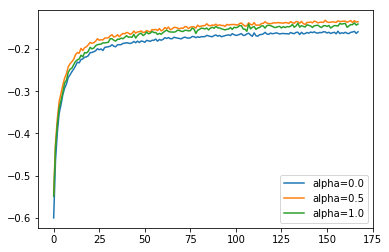

In [15]:
key = 'val_ll'
lengths = [len(r[key]) for r in results]
minlength = min(lengths)
print(lengths)
f, ax = plt.subplots()
for (r, a) in zip(results, alphas):
    ax.plot(r[key][:minlength], label='alpha={}'.format(a))
ax.legend()

# Comparing Keras, TF, and Pytorch CNN implementations

In [16]:
keras_results = pickle.load(open('./keras/saved_models/mnist-cnn-alpha0.5-run1/results.p', 'rb'))
tf_results = pickle.load(open('./tensorflow/saved_models/mnist-cnn-alpha0.5-run1/results.p', 'rb'))
pytorch_results = pickle.load(open('./pytorch/saved_models/mnist-cnn-alpha0.5-run1/results.p', 'rb'))

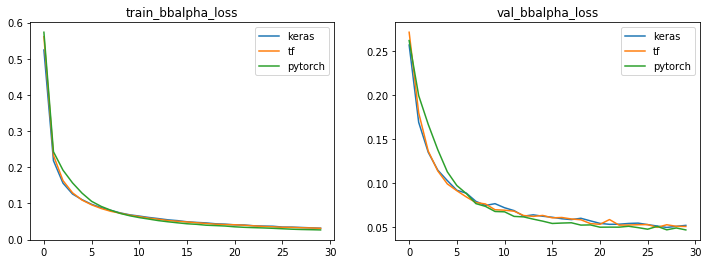

In [17]:
plot_results(keras_results, tf_results, pytorch_results, 'bbalpha_loss')

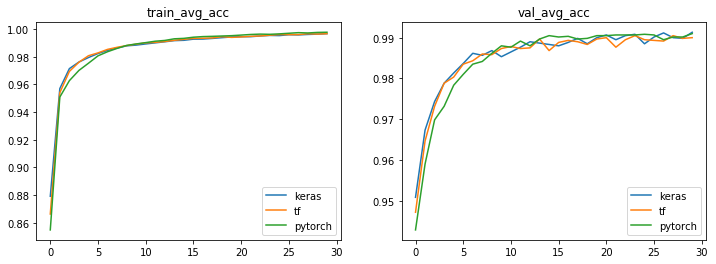

In [18]:
plot_results(keras_results, tf_results, pytorch_results, 'avg_acc')

30


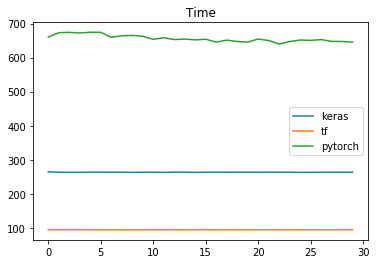

In [19]:
plot_time(keras_results, tf_results, pytorch_results)

# Keras CNN MNIST results

In [20]:
alphas = [0.0, 0.5, 1.0]
results = [pickle.load(open('./keras/saved_models/mnist-cnn-alpha{}-run1/results.p'.format(a), 'rb')) for a in alphas]

[82, 70, 160]


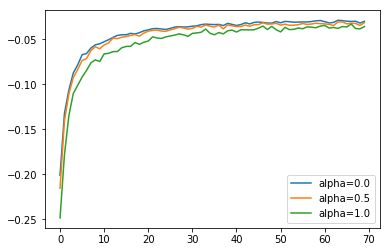

In [21]:
key = 'val_ll'
lengths = [len(r[key]) for r in results]
minlength = min(lengths)
print(lengths)
f, ax = plt.subplots()
for (r, a) in zip(results, alphas):
    ax.plot(r[key][:minlength], label='alpha={}'.format(a))
ax.legend()